# 와인 품질 등급 예측하기

## 목표
- 와인 속성을 분석 후 품질 등급 예측하기

## 데이터 수집
- 오픈데이터 활용 : UCL ML Data 저장소 - http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

### 열구분자를 세미콜론(;)으로 인식시키기

In [25]:
import pandas as pd

# 데이터 분석 때 소수 4째 자리까지 표기 옵션
pd.set_option("display.precision", 4)

In [26]:
red_df = pd.read_csv('winequality-red.csv', sep=';', header=0, engine='python')
white_df = pd.read_csv('winequality-white.csv', sep=';', header=0, engine='python')

In [27]:
red_df.to_csv('winequality-red2.csv', index=False)
white_df.to_csv('winequality-white2.csv', index=False)

- 속성(11개) : fixed acidity(고정산), volatile acidity(휘발산), critric acid(구연산), residual sugar(잔당), chlorides(염화물), free sulfur dioxide(유리 이산화황), total sulfur dioxide(총 이산화황), density(밀도), pH, sulphates(황산염), alcohol(알코올)
- 등급(1개) : quality


## 데이터 병합
- red / white wine 파일 합치기

In [28]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [29]:
red_df.insert(0, column='type', value = 'red')

red_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [30]:
red_df.shape

(1599, 13)

In [31]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [32]:
white_df.insert(0, column='type', value = 'white')

In [33]:
white_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [34]:
white_df.shape

(4898, 13)

In [35]:
wine = pd.concat([red_df, white_df])

In [36]:
wine.to_csv('wine.csv', index = False)

## 데이터 분석
- 기본 정보 확인

In [37]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


- 함수를 이용한 통계 분석

In [38]:
# column에 공백이 있으면 _ 로 채우기
wine.columns = wine.columns.str.replace(' ', '_')

In [40]:
wine.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [41]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.0000,6497.0000,6497.0000,6497.0000,6497.000,6497.0000,6497.0000,6497.0000,6497.0000,6497.0000,6497.0000,6497.0000
mean,7.2153,0.3397,0.3186,5.4432,0.056,30.5253,115.7446,0.9947,3.2185,0.5313,10.4918,5.8184
std,1.2964,0.1646,0.1453,4.7578,0.035,17.7494,56.5219,0.0030,0.1608,0.1488,1.1927,0.8733
min,3.8000,0.0800,0.0000,0.6000,0.009,1.0000,6.0000,0.9871,2.7200,0.2200,8.0000,3.0000
25%,6.4000,0.2300,0.2500,1.8000,0.038,17.0000,77.0000,0.9923,3.1100,0.4300,9.5000,5.0000
50%,7.0000,0.2900,0.3100,3.0000,0.047,29.0000,118.0000,0.9949,3.2100,0.5100,10.3000,6.0000
75%,7.7000,0.4000,0.3900,8.1000,0.065,41.0000,156.0000,0.9970,3.3200,0.6000,11.3000,6.0000
max,15.9000,1.5800,1.6600,65.8000,0.611,289.0000,440.0000,1.0390,4.0100,2.0000,14.9000,9.0000


In [42]:
sorted(wine.quality.unique())

[3, 4, 5, 6, 7, 8, 9]

In [43]:
wine.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

## 데이터 모델링

### describe() 함수로 Group 비교

In [44]:
wine.groupby('type')['quality'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.6360,0.8076,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.8779,0.8856,3.0,5.0,6.0,6.0,9.0


In [45]:
#평균
wine.groupby('type')['quality'].mean()

type
red      5.6360
white    5.8779
Name: quality, dtype: float64

In [46]:
#표준편차
wine.groupby('type')['quality'].std()

type
red      0.8076
white    0.8856
Name: quality, dtype: float64

In [47]:
#agg()함수를 사용하여 평균과 표준편차 묶어서 표현
wine.groupby('type')['quality'].agg(['mean', 'std'])

,mean,std
type,,
red,5.6360,0.8076
white,5.8779,0.8856


### t-검정과 회귀 분석으로 Group 비교

In [48]:
!pip install statsmodels

You should consider upgrading via the 'd:\jupyter\anaconda\python.exe -m pip install --upgrade pip' command.


In [49]:
from scipy import stats
from statsmodels.formula.api import ols, glm

In [50]:
red_wine_quality = wine.loc[wine['type']=='red', 'quality']
white_wine_quality = wine.loc[wine['type']=='white', 'quality']


In [52]:
red_wine_quality.head

<bound method NDFrame.head of 0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64>

In [53]:
#stats.ttest_ind()함수를 이용하여 t-검정을 하고 두 그룹 간의 차이 확인
stats.ttest_ind(red_wine_quality, white_wine_quality, equal_var=False)

Ttest_indResult(statistic=-10.149363059143164, pvalue=8.168348870049682e-24)

In [58]:
# 종속변수 ~ 독립변수1 + 독립변수2 .........
Rformula = 'quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol'


In [62]:
regression_result = ols(Rformula, data=wine).fit() # OLS(Ordinary Least Squares)모델 사용

regression_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Fri, 14 May 2021   Prob (F-statistic):               0.00
Time:                        18:25:07   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627     11.894      4.688      0.000      32.447      79.079
fixed_acidity            0.0677      0.016      4.346      0.000       0.037       0.098
volatile_acidity        -1.3279      0.077    -17.162      0.000      -1.480      -1.176
citric_acid             -0.1097      0.080     -1.377      0.168      -0.266       0.046
residual_sugar           0.0436      0.005      8.449      0.000       0.033       0.054
chlorides               -0.4837      0.333     -1.454      0.146      -1.136       0.168
free_sulfur_dioxide      0.0060      0.001      7.948      0.000       0.004       0.007
total_sulfur_dioxide    -0.0025      0.000     -8.969      0.000      -0.003      -0.002
density                -54.9669     12.137     -4.529      0.000     -78.760     -31.173
pH                       0.4393      0.090      4.861      0.000       0.262       0.616
sulphates                0.7683      0.076     10.092      0.000       0.619       0.917
alcohol                  0.2670      0.017     15.963      0.000       0.234       0.300
==============================================================================
Omnibus:                      144.075   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.712
Skew:                          -0.006   Prob(JB):                     3.09e-71
Kurtosis:                       4.095   Cond. No.                     2.49e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 회귀 분석 문델로 새로운 샘플의 품질 등급 예측하기

- 예측을 위해서 독립변수의 11개 속성에 대한 샘플 데이터가 필요
- 기존 첫 번째 샘플에 대한 예측
- 샘플 2개를 만들어 예측을 수행

In [63]:
# 회의 분석 모델에서 사용할 독립변수 추출, quality, type제외
sample1 = wine[wine.columns.difference(['quality', 'type'])]

In [64]:
# 0~4까지의 5개의 샘플만 추출
sample1 = sample1[0:5][:]

In [65]:
# 회의 분석 모델 적용하여 예측값 sample1_predict에 저장
sample1_predict = regression_result.predict(sample1)

In [66]:
sample1_predict


0    4.9976
1    4.9250
2    5.0347
3    5.6803
4    4.9976
dtype: float64

In [67]:
wine[0:5]['quality']


0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [69]:
data = {"fixed_acidity":[8.5, 8.1], "volatile_acidity":[0.8, 0.5], "citric_acid":[0.3, 0.4], "residual_sugar":[6.1, 5.8],
        "chlorides":[0.055, 0.04], "free_sulfur_dioxide":[30.0, 31.0], "total_sulfur_dioxide":[98.0, 99],
        "density":[0.996, 0.91], "pH":[3.25, 3.01], "sulphates":[0.4, 0.35], "alcohol":[9.0, 0.88]}

In [70]:
sample2 = pd.DataFrame(data, columns=sample1.columns)

sample2

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,9.00,0.055,0.3,0.996,8.5,30.0,3.25,6.1,0.40,98.0,0.8
1,0.88,0.040,0.4,0.910,8.1,31.0,3.01,5.8,0.35,99.0,0.5


In [71]:
sample2_predict = regression_result.predict(sample2)

sample2_predict

0    4.8091
1    7.5821
dtype: float64

## 시각화

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
sns.set_style('dark')

### 히스토그램 그리기

<AxesSubplot:xlabel='quality'>

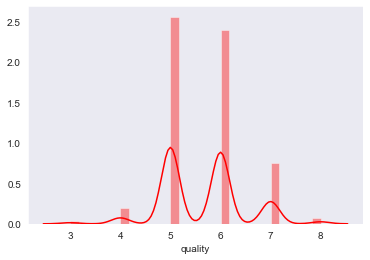

In [74]:
sns.distplot(red_wine_quality, kde=True, color='red', label = 'red wine')


<AxesSubplot:xlabel='quality'>

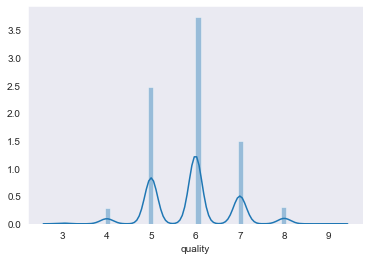

In [75]:
sns.distplot(white_wine_quality, kde=True, label = 'white wine')


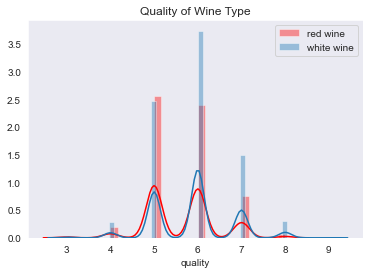

In [77]:
sns.distplot(red_wine_quality, kde=True, color='red', label = 'red wine')
sns.distplot(white_wine_quality, kde=True, label = 'white wine')
plt.title("Quality of Wine Type")
plt.legend()
plt.show()

### 플롯으로 시각화
- 독립 변수가 2개 이상일 경우 부분회귀플롯(partial regression plot)을 사용하여 하나의 독립변수가 종속변수에 미치는 영향력을 시각화

In [78]:
import statsmodels.api as sm
others = list(set(wine.columns).difference(set(["quality", "fixed_acidity"])))

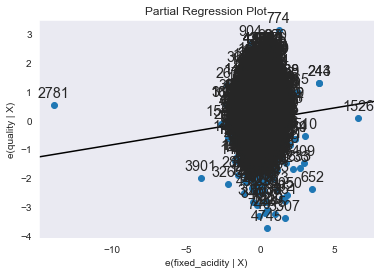

In [79]:
p, resids = sm.graphics.plot_partregress("quality", "fixed_acidity", others, data = wine, ret_coords = True)

In [80]:
fig = plt.figure(figsize = (8, 13))


<Figure size 576x936 with 0 Axes>

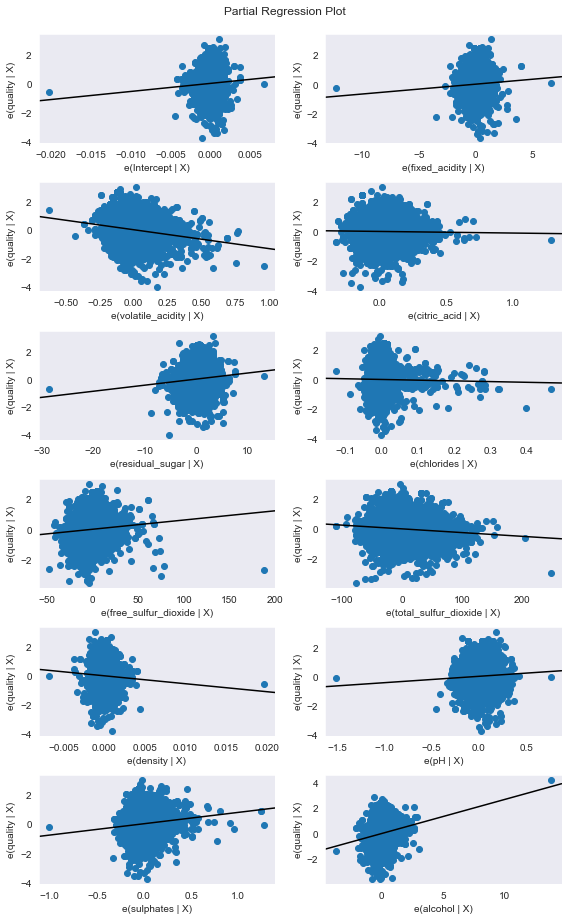

In [81]:
sm.graphics.plot_partregress_grid(regression_result, fig = fig)